# Exploratory Data Analysis - Spanish Movie Reviews
**By Zach Friedman**, zacheryfriedman@my.unt.edu

- Get most frequent sentiment words
- Visualize sentiment words in English translations (need sentiment word dictionary)

In [1]:
import pandas as pd
import regex as re
import spacy
import nltk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from nltk.tokenize import WordPunctTokenizer, sent_tokenize
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/zach/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zach/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/zach/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/zach/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/zach/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/zach/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [143]:
df = pd.read_csv('./IMDB_Dataset_SPANISH.csv')
df.shape

(50000, 5)

In [120]:
df.head()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [144]:
df = df.drop(['Unnamed: 0'], 1)

/tmp/ipykernel_16412/1816312852.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['Unnamed: 0'], 1)


In [122]:
df.isnull().sum()

review_en      0
review_es      0
sentiment      0
sentimiento    0
dtype: int64

Some of the following inconsistencies are present in the data: 
- Missing spaces between sentences in Spanish review columns.
- Hyperlinks (https://) present.
- Email addresses present.

In [149]:
es = df.iloc[1]['review_es']
en = df.iloc[1]['review_en'] 
print(f"ES:\n{es}\n")
print(f"EN:\n{en}\n")

ES:
Una pequeña pequeña producción. La técnica de filmación es muy incuestionable, muy antigua, la moda de la BBC y le da una sensación de realismo reconfortante, y, a veces, incómodo, y, a veces, a la pieza. Los actores son extremadamente bien elegidos, Michael Sheen, no solo "tiene todo el polari", ¡pero tiene todas las voces por palmaditas!Realmente puede ver la edición perfecta guiada por las referencias a las entradas del diario de Williams, no solo vale la pena la observación, pero es una pieza imperrementemente escrita y realizada. Una producción magistral sobre uno de los grandes maestros de la comedia y su vida. El realismo realmente llega a casa con las pequeñas cosas: la fantasía del guardia que, en lugar de usar las técnicas de "sueño" tradicionales permanece sólido, entonces desaparece. Se desempeña nuestro conocimiento y nuestros sentidos, particularmente con las escenas relacionadas con Orton y Halliwell y los conjuntos (particularmente de su apartamento con murales de H

In [136]:
# Select the rows where there is no space between Spanish sentences
pattern = r'([a-z]\S[A-Z])'
mask = df['review_en'].str.contains(pattern)

filtered_df = df[mask]
filtered_df

/tmp/ipykernel_16412/1655394392.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df['review_en'].str.contains(pattern)


,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...,...
49994,49994,This is your typical junk comedy.There are alm...,Esta es tu comedia de chatarra típica. Casi no...,negative,negativo
49995,49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo


In [142]:
filtered_df['review_en'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [131]:
#pattern = r'https?://[A-Za-z0-9./]+'
#pattern = r'@[A-Za-z0-9]+'
pattern = r'\S+@\S+'
mask = df['review_es'].str.contains(pattern)

filtered_df = df[mask]
filtered_df

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
1281,1281,I like many others saw this as a child and I l...,Me gustaría que muchos otros vieron esto como ...,positive,positivo
3568,3568,I have noticed that people have asked if anyon...,Me he dado cuenta de que las personas han preg...,positive,positivo
5068,5068,Brilliant adaptation of the largely interior m...,Formulante adaptación de los monólogos en gran...,positive,positivo
5724,5724,"OK, so she doesn't have caller ID. When you ar...","Ok, entonces ella no tiene identificador de ll...",negative,negativo
8176,8176,I could never remember the name of this show. ...,Nunca podría recordar el nombre de este espect...,positive,positivo
8474,8474,I'm like the rest of the fans who love this co...,Soy como el resto de los fanáticos que aman es...,positive,positivo
9510,9510,I cant believe how many excellent actors can b...,No puedo creer cuántos excelentes actores pued...,positive,positivo
9978,9978,I really can't say too much more about the plo...,Realmente no puedo decir mucho más sobre la tr...,positive,positivo
12166,12166,Robert Jordan is a television star. Robert Jor...,Robert Jordan es una estrella de televisión.Ro...,positive,positivo
13471,13471,This movie was everything but boring. It deals...,Esta película fue todo menos aburrida.Se trata...,positive,positivo


In [147]:
hyperlinks = r'https?://[A-Za-z0-9./]+'
emails = r'\S+@\S+'
sentence = r'\.(?=[A-Z])'

def replace_pattern(pattern):
    return ''

def insert_space(pattern):
    return pattern.group() + ' '

# Clean the English reviews
df['review_en'] = df['review_en'].apply(lambda x: re.sub(hyperlinks, replace_pattern, x))
df['review_en'] = df['review_en'].apply(lambda x: re.sub(emails, replace_pattern, x))
df['review_en'] = df['review_en'].apply(lambda x: re.sub(sentence, insert_space, x))

# Clean the Spanish reviews
df['review_es'] = df['review_es'].apply(lambda x: re.sub(hyperlinks, replace_pattern, x))
df['review_es'] = df['review_es'].apply(lambda x: re.sub(emails, replace_pattern, x))
df['review_es'] = df['review_es'].apply(lambda x: re.sub(sentence, insert_space, x))

In [150]:
df.to_csv('sanitized_v2.csv')

In [148]:
b = df.iloc[0]['review_es']
print(b)

Uno de los otros críticos ha mencionado que después de ver solo 1 Oz Episodio, estará enganchado. Tienen razón, ya que esto es exactamente lo que sucedió conmigo. La primera cosa que me golpeó sobre Oz fue su brutalidad y sus escenas de violencia inconfiadas, que se encuentran a la derecha de la palabra. Confía en mí, este no es un espectáculo para los débiles de corazón o tímido. Este espectáculo no extrae punzones con respecto a las drogas, el sexo o la violencia. Es Hardcore, en el uso clásico de la palabra. Se llama OZ, ya que es el apodo dado al Penitenciario del Estado de Seguridad Máximo de Oswald. Se centra principalmente en la ciudad de Emeralda, una sección experimental de la prisión donde todas las células tienen frentes de vidrio y se enfrentan hacia adentro, por lo que la privacidad no es alta en la agenda. Em City es el hogar de muchos ... Fariarios, musulmanes, gangstas, latinos, cristianos, italianos, irlandeses y más ... así que las esposas, las miradas de muerte, las 

In [8]:
x = filtered_df.iloc[33081]['review_en']
print(x)

No one expects the Star Trek movies to be high art, but the fans do expect a movie that is as good as some of the best episodes. Unfortunately, this movie had a muddled, implausible plot that just left me cringing - this is by far the worst of the nine (so far) movies. Even the chance to watch the well known characters interact in another movie can't save this movie - including the goofy scenes with Kirk, Spock and McCoy at Yosemite.I would say this movie is not worth a rental, and hardly worth watching, however for the True Fan who needs to see all the movies, renting this movie is about the only way you'll see it - even the cable channels avoid this movie.


In [27]:
# Define some preprocessing functions, as well as VADER sentiment analyzer
# As of now, preprocess is unused. Use sentence_tokenizer.
def preprocess(doc):
    # Instantiate the tools to tokenize and stem a given review
    tokenizer = WordPunctTokenizer()
    #porter = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    tokens = tokenizer.tokenize(doc)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    #tokens = [porter.stem(token) for token in tokens]
    
    return tokens

def analyze(doc):
    sia = SentimentIntensityAnalyzer()
    #doc = " ".join(doc)
    #sentiment = sia.polarity_scores(doc)
    return sia.polarity_scores(doc)

def sentence_tokenizer(doc):
    sentences = sent_tokenize(doc)
    #lemmatizer = WordNetLemmatizer()
    
    sentences = [[word.lower() for word in sent.split() if word not in stopwords.words('english')] for sent in sentences]
    
    return [" ".join(sent) for sent in sentences]


In [10]:
y = sentence_tokenizer(x) # Apply sentence tokenization to the review
print(y) # Print the result

['no one expects star trek movies high art, fans expect movie good best episodes.', 'unfortunately, movie muddled, implausible plot left cringing - far worst nine (so far) movies.', "even chance watch well known characters interact another movie can't save movie - including goofy scenes kirk, spock mccoy yosemite.i would say movie worth rental, hardly worth watching, however true fan needs see movies, renting movie way see - even cable channels avoid movie."]


In [11]:
a = preprocess(x) # Apply word tokenization to the review
print(a) # Print the result

['one', 'expects', 'star', 'trek', 'movie', 'high', 'art', 'fan', 'expect', 'movie', 'good', 'best', 'episode', 'unfortunately', 'movie', 'muddled', 'implausible', 'plot', 'left', 'cringing', 'far', 'worst', 'nine', 'far', 'movie', 'even', 'chance', 'watch', 'well', 'known', 'character', 'interact', 'another', 'movie', 'save', 'movie', 'including', 'goofy', 'scene', 'kirk', 'spock', 'mccoy', 'yosemite', 'would', 'say', 'movie', 'worth', 'rental', 'hardly', 'worth', 'watching', 'however', 'true', 'fan', 'need', 'see', 'movie', 'renting', 'movie', 'way', 'see', 'even', 'cable', 'channel', 'avoid', 'movie']


In [12]:
for sent in y: # For each sentence in the review...
    z = analyze(sent) # Apply NLTK's SentimentIntensityAnalyzer
    print(z) # Display the sentiment polarity scores for each sentence

{'neg': 0.108, 'neu': 0.542, 'pos': 0.35, 'compound': 0.7096}
{'neg': 0.371, 'neu': 0.629, 'pos': 0.0, 'compound': -0.7579}
{'neg': 0.093, 'neu': 0.656, 'pos': 0.251, 'compound': 0.7329}


In [28]:
df['review_en'] = df['review_en'].apply(sentence_tokenizer) # Apply sentence tokenization to each English review in the dataframe

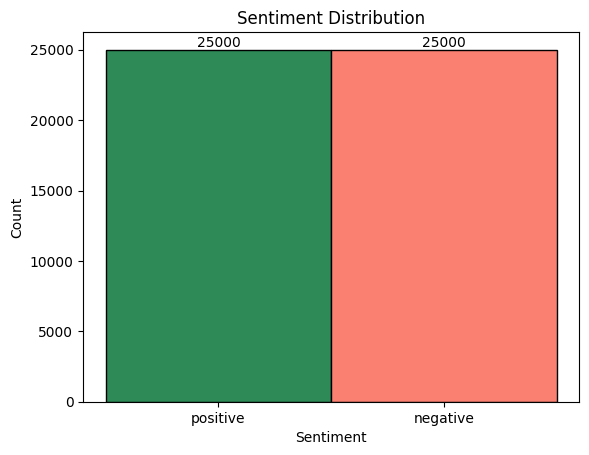

In [13]:
# Plot a histogram of sentiment distribution across all English reviews in the dataframe
ax = sns.histplot(x='sentiment', data=df, stat='count')
ax.patches[0].set_facecolor('seagreen')
ax.patches[1].set_facecolor('salmon')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [25]:
text = ' '.join(df['review_en'].astype(str)) # Join the text of every English review in the dataset into one long sentence
text = text.split(" ") # Split the long string of words into individual words

text = [word.lower() for word in text if word.lower() not in stopwords.words('english')] # Remove stopwords and lowercase

wordcloud_dict = Counter(text) # Create a counter for word frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='plasma', stopwords=stopwords.words('english')).generate_from_frequencies(wordcloud_dict)

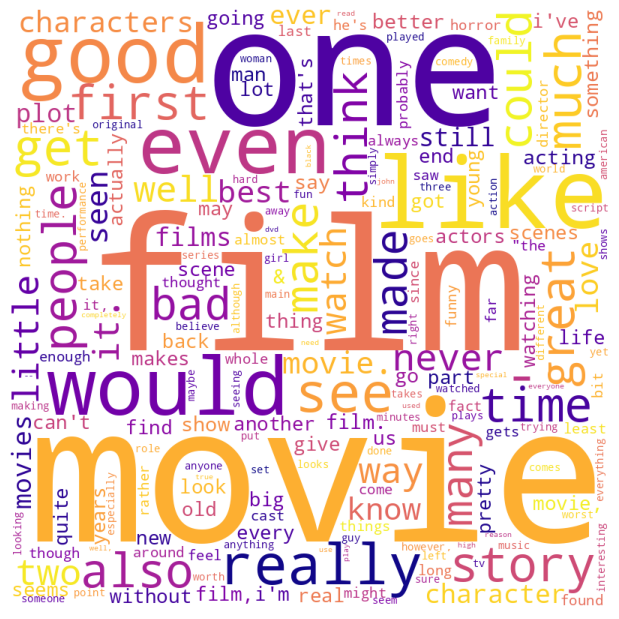

In [26]:
# Plot the word cloud
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()